#**이번 실습 과제3에서는 HuggingFace 라이브러리를 활용하여,생성형 인공지능(Generative AI)의 두 가지 핵심적인 응용 분야인 컴퓨터 비전(Computer Vision)과 자연어 처리(Natural Language Processing)를 실습해보겠습니다.**#

## **메뉴 → 런타임 → 런타임 유형 변경 → GPU로 설정해야 에러없이 진행됩니다**##

###**Problem 1. Machine Translation & Image Generation**

이 실습 과제에서는 자연어 처리 기술을 사용하여 텍스트를 번역하는 기계번역(Machine Translation) 작업을 수행 후 이를 기반으로 실제 이미지 생성(Image Generation)이 어떻게 작동되는지를 실습합니다.

창의적인 텍스트 프롬프트(한글)를 제공하여, 이를 기반으로 실제 이미지를 생성해보세요.

In [3]:
!pip install --upgrade -qq diffusers transformers[sentencepiece] sacremoses accelerate scipy safetensors gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 53.2 MB/s eta 0:00:00


In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

In [5]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-ko-en", clean_up_tokenization_spaces=True)
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-ko-en")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/842k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [23]:
prompt = "고양이가 해변에서 휴가를 보내는 모습을 그려." # Q1. 번역하고자 하는 문장을 한글로 작성하세요.
tokenized_text = tokenizer(prompt, return_tensors='pt')

translation_tokens = model.generate(**tokenized_text)
translated_text = tokenizer.decode(translation_tokens[0], skip_special_tokens=True)

In [7]:
import warnings
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

warnings.filterwarnings("ignore", category=FutureWarning)
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Orginal Prompt: 고양이가 해변에서 휴가를 보내는 모습을 그려.
Translated Prompt: It's a cat taking a vacation on the beach.



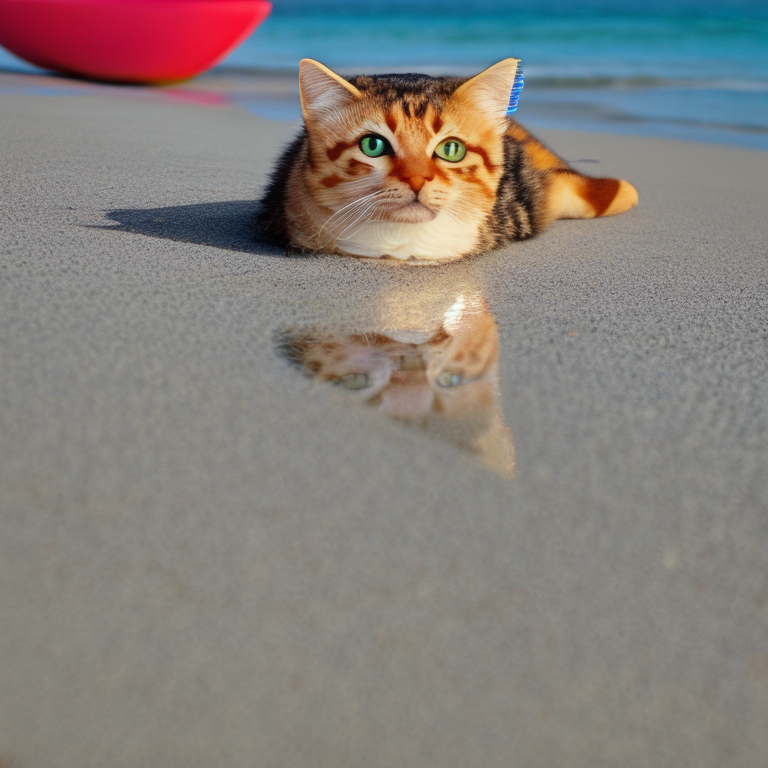

In [25]:
image = pipe(translated_text).images[0]

image.save(f"2024_AI_BU.png")

print(f"Orginal Prompt: {prompt}\nTranslated Prompt: {translated_text}\n")
image

###**Problem 2. Sentiment Analysis**
이 실습 과제에서는 자연어 처리 기술을 사용하여 문장의 감성 분석(Sentiment Analysis) 작업을 수행합니다.

영어로 된 문장 3개를 제공하여, 각 해당 문장의 감성 분석을 실습합니다.

In [9]:
import warnings
from transformers import pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

warnings.filterwarnings("ignore", category=FutureWarning)
sentiment_analysis = pipeline("sentiment-analysis", model=model_name, device=0)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [32]:
def convert_to_sentiment_label(label):
    if label == "LABEL_2":
        label = "긍정"
    elif label == "LABEL_1":
        label = "중립"
    elif label == "LABEL_0":
        label = "부정"
    return label

sentences = [
    "The scenery at the mountain was breathtaking and truly unforgettable.",
    "This book is about the history of ancient civilizations.",
    "This is the worst experience I've ever had with a customer service team."
] # Q2. 분석하고자 하는 문장 3개를 각각 영어로 작성하세요.


In [33]:
results = sentiment_analysis(sentences)

for sentence, result in zip(sentences, results):
  label = result['label']
  score = result['score']
  converted_label = convert_to_sentiment_label(label)
  print(f"Text: {sentence}\nSentiment: {converted_label}\nProbability: {round(score * 100, 2)}%\n")

Text: The scenery at the mountain was breathtaking and truly unforgettable.
Sentiment: 긍정
Probability: 98.18%

Text: This book is about the history of ancient civilizations.
Sentiment: 중립
Probability: 87.11%

Text: This is the worst experience I've ever had with a customer service team.
Sentiment: 부정
Probability: 98.27%

